In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_caba = pd.read_feather('./data/CovidCabaFeather')
df_caba.head()

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
0,0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaT,...,NO,NaT,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0
1,6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0
2,8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7
3,10,1000012,M,46.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-26,...,NO,NaT,NO,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-05-31,0
4,13,1000015,F,29.0,Años,Argentina,CABA,COMUNA 07,Buenos Aires,2020-05-18,...,NO,NaT,NO,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7


In [3]:
pd.unique(df_caba.residencia_departamento_nombre .values)

array(['SIN ESPECIFICAR', 'COMUNA 07', 'COMUNA 03', 'COMUNA 04',
       'COMUNA 02', 'COMUNA 12', 'COMUNA 06', 'COMUNA 13', 'COMUNA 08',
       'COMUNA 05', 'COMUNA 15', 'COMUNA 10', 'COMUNA 14', 'COMUNA 01',
       'COMUNA 09', 'COMUNA 11'], dtype=object)

## Unificamos la escala de edades

Dividimos las edades en meses por 12 asi medimos todo en años

In [4]:
df_caba.loc[df_caba.edad_años_meses == 'Meses', 'edad'] = df_caba.edad / 12
df_caba.loc[df_caba.edad_años_meses == 'Meses',:]

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
161,737,1000994,F,0.333333,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-06-01,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-06-01,0
325,1366,1001796,F,0.500000,Meses,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,NaT,7
343,1409,1001862,NR,0.500000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-06-01,0
457,1707,1002272,F,0.500000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,0
511,1853,1002474,M,0.833333,Meses,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - Activo Inter...,Confirmado,2,2020-06-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360486,2359087,996913,NR,0.916667,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-05-31,0
360660,2359558,997460,F,0.750000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-28,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-05-28,0
360861,2360168,998140,F,0.583333,Meses,Argentina,CABA,COMUNA 01,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,1
360954,2360461,998524,F,0.833333,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-05-29,0


Con las edades unificadas removemos la columna 'edad_años_meses' y aprovechamos para sacar tambien las columnas 'residencia_provincia_nombre', 'residencia_pais_nombre', 'sepi (semana epidemiologica) apertura', 'carga_provincia_id', 'residencia_provincia_id','residencia_departamento_id' ya solo vamos a usar los datos de CABA.

In [5]:
df_caba = df_caba.drop(['index', 'edad_años_meses', 'residencia_provincia_nombre','residencia_pais_nombre','sepi_apertura',
                       'carga_provincia_id','residencia_provincia_id','residencia_departamento_id'], axis=1)

In [6]:
df_caba.tail()

,id_evento_caso,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico
361128,999976,F,27.0,SIN ESPECIFICAR,CABA,2020-05-15,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-01
361129,999982,M,38.0,SIN ESPECIFICAR,Tucumán,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-02
361130,999990,F,50.0,SIN ESPECIFICAR,CABA,2020-05-28,2020-06-01,2020-05-31,NO,NaT,NO,NaT,NO,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-06-01
361131,999996,M,42.0,SIN ESPECIFICAR,CABA,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Privado,Caso Descartado,Descartado,2020-06-01
361132,999997,F,30.0,SIN ESPECIFICAR,Córdoba,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-02


## Modificamos las columnas con strings 'SI'/'NO' por variables booleanas.

In [7]:
df_caba.loc[df_caba.fallecido == 'NO', 'fallecido'] = False
df_caba.loc[df_caba.fallecido == 'SI', 'fallecido'] = True

df_caba.loc[df_caba.asistencia_respiratoria_mecanica == 'NO', 'asistencia_respiratoria_mecanica'] = False
df_caba.loc[df_caba.asistencia_respiratoria_mecanica == 'SI', 'asistencia_respiratoria_mecanica'] = True

Hacemos lo mismo para la columna 'sexo'

In [8]:
df_caba.loc[df_caba.sexo == 'M', 'sexo'] = 0
df_caba.loc[df_caba.sexo == 'F', 'sexo'] = 1

## Ordenamos los datos de acuerdo a la fecha de apertura


In [9]:
df_caba['fecha_apertura'] =pd.to_datetime(df_caba.fecha_apertura)
df_caba = df_caba.sort_values(by='fecha_apertura')
df_caba.reset_index(inplace=True,drop=True)
df_caba

,id_evento_caso,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico
0,717926,1,41.0,COMUNA 12,CABA,2020-01-23,2020-01-31,NaT,NO,NaT,False,NaT,False,Público,Caso Invalidado Epidemiologicamente,Descartado,NaT
1,718055,1,34.0,SIN ESPECIFICAR,CABA,2020-01-16,2020-01-31,NaT,NO,NaT,False,NaT,False,Privado,Caso Descartado,Descartado,2020-02-11
2,718058,1,31.0,SIN ESPECIFICAR,CABA,NaT,2020-01-31,NaT,NO,NaT,False,NaT,False,Privado,Caso Descartado,Descartado,2020-02-11
3,720253,0,29.0,COMUNA 11,CABA,2020-02-03,2020-02-05,NaT,NO,NaT,False,NaT,False,Público,Otro diagnostico,Descartado,NaT
4,731484,1,32.0,SIN ESPECIFICAR,CABA,NaT,2020-02-26,NaT,NO,NaT,False,NaT,False,Privado,Caso Invalidado Epidemiologicamente,Descartado,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361128,3019510,0,60.0,SIN ESPECIFICAR,CABA,2020-09-19,2020-09-30,NaT,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-10-01
361129,3019535,0,45.0,SIN ESPECIFICAR,CABA,2020-09-26,2020-09-30,NaT,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-10-01
361130,3019596,1,55.0,COMUNA 04,CABA,NaT,2020-09-30,2020-09-30,NO,NaT,False,NaT,False,Público,Caso Descartado,Descartado,2020-09-30
361131,3019481,0,15.0,SIN ESPECIFICAR,CABA,NaT,2020-09-30,NaT,NO,NaT,False,NaT,False,Privado,Caso Descartado,Descartado,2020-09-30


## Evaluamos datos faltantes por columnas

In [10]:
df_caba.isnull().sum()

id_evento_caso                           0
sexo                                     0
edad                                   256
residencia_departamento_nombre           0
carga_provincia_nombre                   0
fecha_inicio_sintomas               189734
fecha_apertura                           0
fecha_internacion                   317362
cuidado_intensivo                        0
fecha_cui_intensivo                 356249
fallecido                                0
fecha_fallecimiento                 355767
asistencia_respiratoria_mecanica         0
origen_financiamiento                    0
clasificacion                            0
clasificacion_resumen                    0
fecha_diagnostico                    34788
dtype: int64

## ¿Qué hacemos con los datos faltantes?

- edad --> reemplazar por el promedio de edad de edades(?) // descartar esos datos? (obs: en los confirmados quedarian solo 37 datos faltantes)

- "fecha_inicio_sintomas" y "fecha_internacion" --> las transformamoes en variables booleanas y descartamos las columnas originales

- "fecha_cuidado_intensivo" --> descartar y quedarse unicamente con la columna de "cuidado_intensivo"

- "fecha_fallecimiento" --> VER

- "fecha_diagnostico" --> ver si DESCARTAR o transformar en diagnosticado (variable booleana)


### Transformamos "fecha_inicio_sintomas" y "fecha_internacion" en variables booleanas


In [13]:
check_for_nan_sintomas = df_caba['fecha_inicio_sintomas'].notnull()
check_for_nan_internacion = df_caba['fecha_internacion'].notnull()

df_caba['presenta_sintomas'] = check_for_nan_sintomas
df_caba['requiere_internacion'] = check_for_nan_internacion

Ahora que transformamos las variables, descartamos las columnas originales: "fecha_inicio_sintomas" y "fecha_internacion". Aprovechamos y descartamos "fecha_cuidado_intensivo" tambien.

In [ ]:
#df_caba = df_caba.drop(['fecha_inicio_sintomas', 'fecha_internacion','fecha_cui_intensivo'],axis=1)

### Creamos un df unicamente con casos CONFIRMADOS de CABA

In [15]:
df_confirmados = pd.DataFrame(df_caba.loc[df_caba.clasificacion_resumen == 'Confirmado'])
df_confirmados.reset_index(inplace=True,drop=True)
df_confirmados.head() #notar que el primer caso confirmado fue el 02-03-2020

,id_evento_caso,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,presenta_sintomas,requiere_internacion
0,734634,0,43.0,COMUNA 01,CABA,2020-02-28,2020-03-02,2020-03-01,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-03,True,True
1,739292,0,24.0,COMUNA 13,CABA,2020-03-01,2020-03-05,2020-03-03,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-11,True,True
2,738965,0,47.0,COMUNA 03,CABA,2020-03-03,2020-03-05,2020-03-03,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06,True,True
3,738908,1,72.0,COMUNA 07,CABA,2020-03-04,2020-03-05,NaT,NO,NaT,False,NaT,False,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-06,True,False
4,737975,0,45.0,COMUNA 05,CABA,2020-03-04,2020-03-05,NaT,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06,True,False


In [16]:
df_confirmados.isnull().sum()

id_evento_caso                           0
sexo                                     0
edad                                    37
residencia_departamento_nombre           0
carga_provincia_nombre                   0
fecha_inicio_sintomas                47648
fecha_apertura                           0
fecha_internacion                   107319
cuidado_intensivo                        0
fecha_cui_intensivo                 124735
fallecido                                0
fecha_fallecimiento                 122894
asistencia_respiratoria_mecanica         0
origen_financiamiento                    0
clasificacion                            0
clasificacion_resumen                    0
fecha_diagnostico                      635
presenta_sintomas                        0
requiere_internacion                     0
dtype: int64

In [18]:
df_confirmados.shape

(127054, 19)

### Analizamos casos confirmados acumulados diarios

In [19]:
#cuento casos diarios y los acumulo por dia
confirmados_xdias=df_confirmados.groupby("fecha_apertura").size()
confirmados_xdias

fecha_apertura
2020-03-02      1
2020-03-05      5
2020-03-06      1
2020-03-07      1
2020-03-08      1
             ... 
2020-09-26    696
2020-09-27    569
2020-09-28    787
2020-09-29    908
2020-09-30    856
Length: 211, dtype: int64

In [20]:
#creo un vector con fechas completas desde 01-03-20 hasta 29-09-20 (y hasta 15-10-2020 para fallecidos)
df_fechas = pd.date_range('03-01-2020', '09-30-2020') #para casos confirmados
df_fechas2 = pd.date_range('03-01-2020', '15-10-2020') #para fallecidos

In [21]:
#relleno las fechas faltantes del dataset con 0 casos confirmados
confirmados_xdias.index = pd.DatetimeIndex(confirmados_xdias.index)

confirmados_xdias = confirmados_xdias.reindex(df_fechas, fill_value=0)
confirmados_xdias.columns = ['fecha_apertura','casos_positivos']
confirmados_xdias

2020-03-01      0
2020-03-02      1
2020-03-03      0
2020-03-04      0
2020-03-05      5
             ... 
2020-09-26    696
2020-09-27    569
2020-09-28    787
2020-09-29    908
2020-09-30    856
Freq: D, Length: 214, dtype: int64

### Ahora analizamos fallecidos a partir de los casos confirmados

In [22]:
#contamos fallecidos diarios
fallecidos_xdia=df_confirmados.groupby("fecha_fallecimiento").size()
fallecidos_xdia

fecha_fallecimiento
2020-03-07     1
2020-03-18     1
2020-03-25     2
2020-03-27     1
2020-03-28     1
              ..
2020-10-11     8
2020-10-12     7
2020-10-13    10
2020-10-14     5
2020-10-15     7
Length: 198, dtype: int64

In [23]:
#agrego las fechas faltantes del dataset con 0 casos fallecidos
fallecidos_xdia.index = pd.DatetimeIndex(fallecidos_xdia.index)
fallecidos_xdia = fallecidos_xdia.reindex(df_fechas2, fill_value=0)
fallecidos_xdia.columns = ['fecha_fallecimiento','cantidad_fallecidos']
fallecidos_xdia

2020-03-01     0
2020-03-02     0
2020-03-03     0
2020-03-04     0
2020-03-05     0
              ..
2020-10-11     8
2020-10-12     7
2020-10-13    10
2020-10-14     5
2020-10-15     7
Freq: D, Length: 229, dtype: int64

### Cantidad de personas que presentaron sintomas (diarios) 

In [25]:
sintomaticos_xdia =df_caba.groupby('fecha_inicio_sintomas').size()
sintomaticos_xdia.index= pd.DatetimeIndex(sintomaticos_xdia.index)
sintomaticos_xdia = sintomaticos_xdia.reindex(df_fechas2, fill_value=0)
sintomaticos_xdia.columns = ['fecha_inicio_sintomas','cantidad_sintomaticos']
sintomaticos_xdia

2020-03-01    19
2020-03-02    17
2020-03-03    15
2020-03-04    17
2020-03-05    12
              ..
2020-10-11     8
2020-10-12     0
2020-10-13     3
2020-10-14     1
2020-10-15     0
Freq: D, Length: 229, dtype: int64

###  Cantidad de personas que requirieron internacion (diarios) 

In [24]:
internacion_xdia =df_caba.groupby('fecha_internacion').size()
internacion_xdia.index= pd.DatetimeIndex(internacion_xdia.index)
internacion_xdia = internacion_xdia.reindex(df_fechas2, fill_value=0)
internacion_xdia.columns = ['fecha_internacion','cantidad']
internacion_xdia

2020-03-01    2
2020-03-02    3
2020-03-03    2
2020-03-04    7
2020-03-05    2
             ..
2020-10-11    1
2020-10-12    1
2020-10-13    1
2020-10-14    1
2020-10-15    0
Freq: D, Length: 229, dtype: int64

### Cantidad de personas que requirieron cui (cuidado intensivo)

In [26]:
cui_xdia =df_caba.groupby('fecha_cui_intensivo').size()
cui_xdia.index= pd.DatetimeIndex(cui_xdia.index)
cui_xdia = internacion_xdia.reindex(df_fechas2, fill_value=0)
cui_xdia.columns = ['fecha_cui_intensivo','cantidad']
cui_xdia

2020-03-01    2
2020-03-02    3
2020-03-03    2
2020-03-04    7
2020-03-05    2
             ..
2020-10-11    1
2020-10-12    1
2020-10-13    1
2020-10-14    1
2020-10-15    0
Freq: D, Length: 229, dtype: int64

### Armamos un df con la info recopilada (para CABA)

In [28]:
data = {'casos confirmados': confirmados_xdias, 
        'casos sintomaticos': sintomaticos_xdia,
       'casos que requirieron internacion': internacion_xdia,
       'casos que requirieron cui': cui_xdia,
       'casos fallecidos': fallecidos_xdia}
df_data_all = pd.DataFrame(data=data)
df_data_all

,casos confirmados,casos sintomaticos,casos que requirieron internacion,casos que requirieron cui,casos fallecidos
2020-03-01,0.0,19,2,2,0
2020-03-02,1.0,17,3,3,0
2020-03-03,0.0,15,2,2,0
2020-03-04,0.0,17,7,7,0
2020-03-05,5.0,12,2,2,0
...,...,...,...,...,...
2020-10-11,NaN,8,1,1,8
2020-10-12,NaN,0,1,1,7
2020-10-13,NaN,3,1,1,10
2020-10-14,NaN,1,1,1,5


## Graficamos


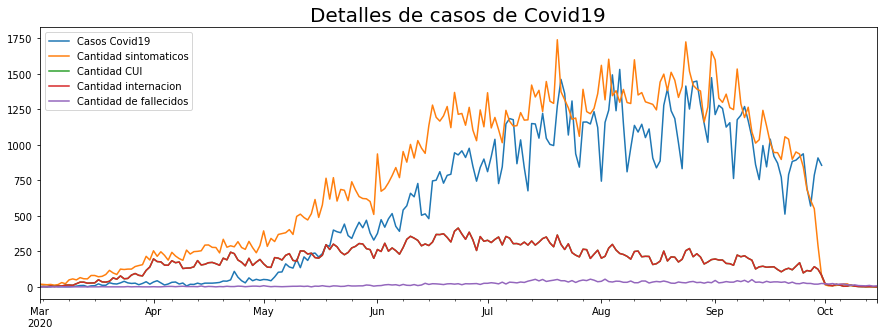

In [45]:
plt.figure(figsize=(15,5))

confirmados_xdias.plot(x='fecha_apertura', y='casos_positivos', label="Casos Covid19")
sintomaticos_xdia.plot(x='fecha_inicio_sintomas', y='cantidad_sintomaticos',label="Cantidad sintomaticos")
cui_xdia.plot(x='fecha_cui_intensivo',y= 'cantidad', label="Cantidad CUI")
internacion_xdia.plot(x='fecha_internacion',y='cantidad',label="Cantidad internacion")
fallecidos_xdia.plot(x= 'fecha_fallecimiento',y = 'cantidad_fallecidos',label = "Cantidad de fallecidos")
plt.title('Detalles de casos de Covid19',size = 20)
plt.legend()
plt.show()

### Casos confirmados (positivos) vs. tiempo

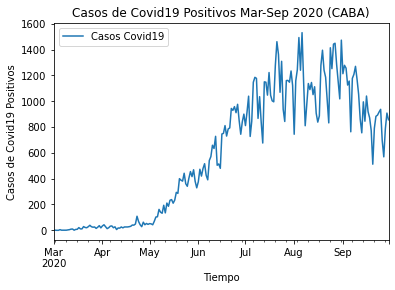

In [29]:
confirmados_xdias.plot(x='fecha_apertura', y='casos_positivos', label="Casos Covid19")

plt.xlabel('Tiempo')
plt.ylabel('Casos de Covid19 Positivos')
plt.title('Casos de Covid19 Positivos Mar-Sep 2020 (CABA)')
plt.legend()
plt.show()

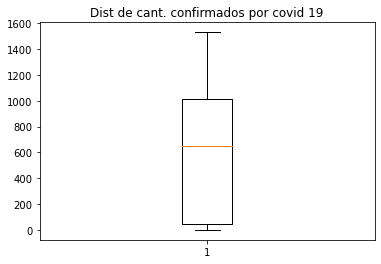

In [46]:
plt.boxplot(confirmados_xdias)
plt.title("Dist de cant. confirmados por covid 19")
plt.show()

### Casos confirmados y fallecidos vs. tiempo

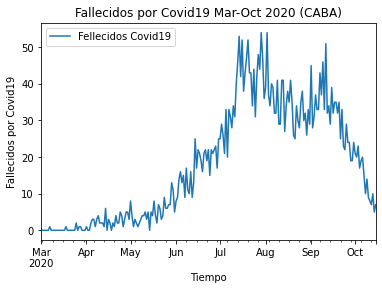

In [31]:
fallecidos_xdia.plot(x='fecha_fallecimiento', y='cantidad_fallecidos', label="Fellecidos Covid19")

plt.xlabel('Tiempo')
plt.ylabel('Fallecidos por Covid19')
plt.title('Fallecidos por Covid19 Mar-Oct 2020 (CABA)')
plt.legend()
plt.show()

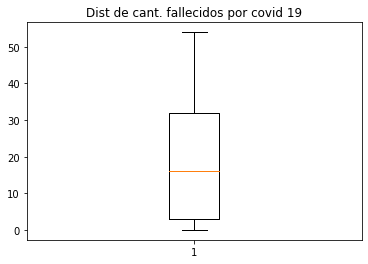

In [47]:
plt.boxplot(fallecidos_xdia)
plt.title("Dist de cant. fallecidos por covid 19")
plt.show()